**Работу выполнил Трофимов Михаил, ПМ22-1**

In [143]:
#Импортируем необходимые библиотеки и функции
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (LogisticRegression, RidgeClassifier,
                                  LinearRegression, Ridge, Lasso)
from yellowbrick.model_selection import LearningCurve
from sklearn.metrics import (precision_score, recall_score, f1_score, make_scorer)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Методические указания

**Цель работы**

Познакомиться с основными проблемами обобщающей способности алгоритмов машинного обучения: overfitting (переобучение) и underfitting (недообучение).

**Задания для выполнения**

1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.
2. Сделайте количественное описание датасета: число признаков, статистику по признакам.
3. Отделите целевую переменную Outcome.
4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.
5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.
6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.
7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.
8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.
9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.
10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

**Диагностика моделей классификации**

In [2]:
#Генерируем датасет, делим его на тестовую и обучающую выборки
X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0, 
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

In [3]:
#Обучаем модель логистической регрессии, выводим её метрики
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


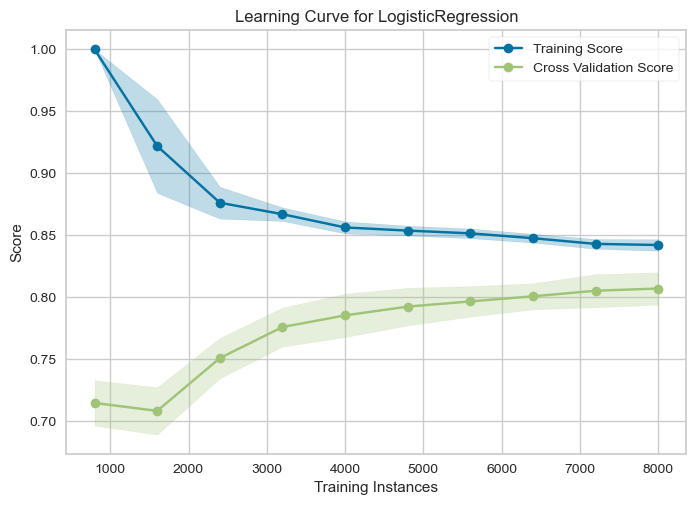

In [4]:
#Строим кривую обучения
visualizer = LearningCurve(
    LogisticRegression(max_iter = 1000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show() #Данная модель переобучилась

In [5]:
#Обучаем модель гребневой регрессии (с регуляризацией), выводим её метрики
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


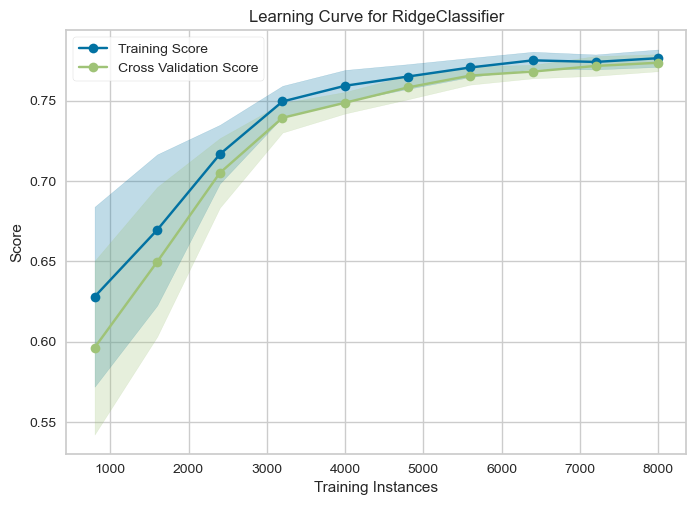

In [6]:
#Строим кривую обучения
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show() #Модель недообучилась

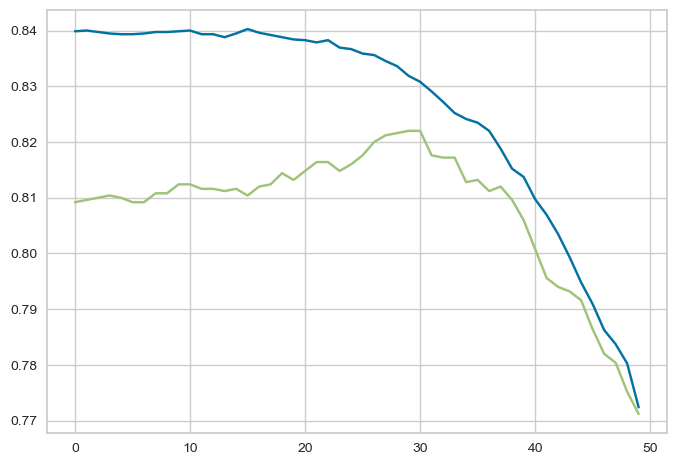

In [7]:
#Ищем оптимальную модель между переобучившейся и недообучившейся

trains = []
tests = []
for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [8]:
#Оптимальная модель
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train) #Около 30

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


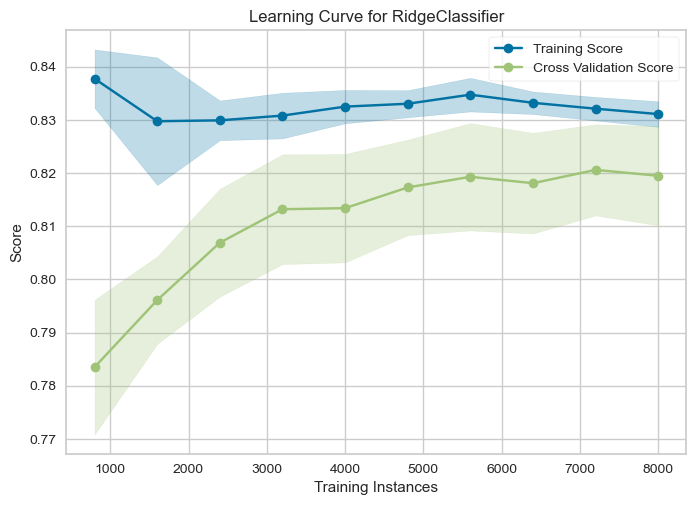

In [9]:
#Строим кривую обучения
visualizer = LearningCurve(
    RidgeClassifier(alpha=26500), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

**Диагностика моделей регрессии**

In [10]:
#Загружаем датасет цен на недвижимость
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [11]:
#Модель линейной регрессии
lr = LinearRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.9521
Test score: 0.6075


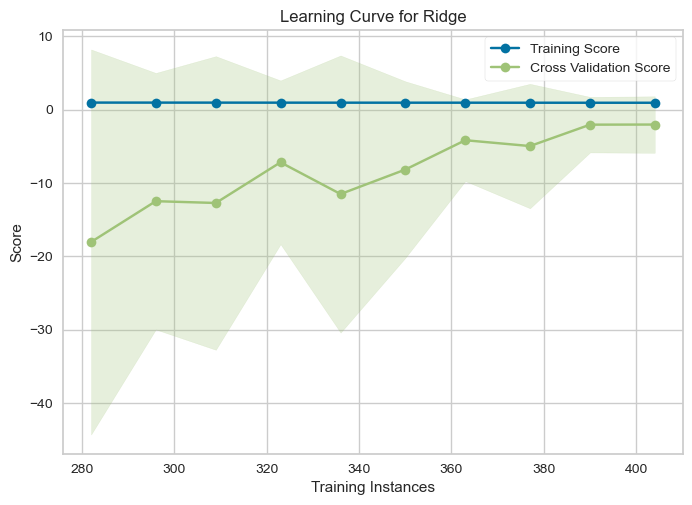

In [12]:
#Кривая обучения
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y).show()  #Модель переобучена

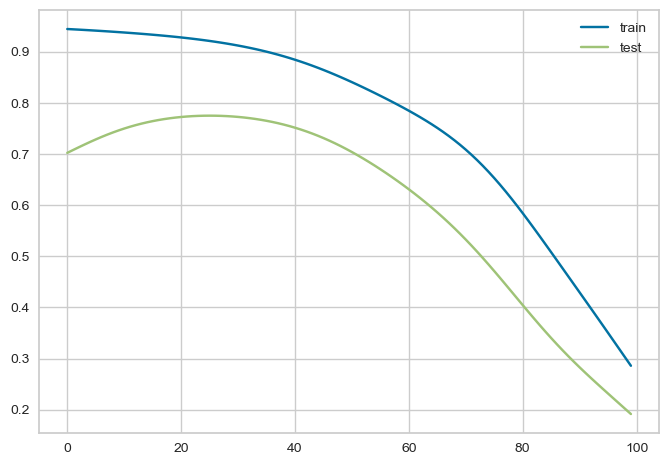

In [13]:
#Поиск оптимума по регуляризации
trains = []
tests = []
for i in np.logspace(-2, 3, 100):
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [14]:
lr = Ridge(alpha=0.18).fit(X_train, y_train) #Среди 20-30

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


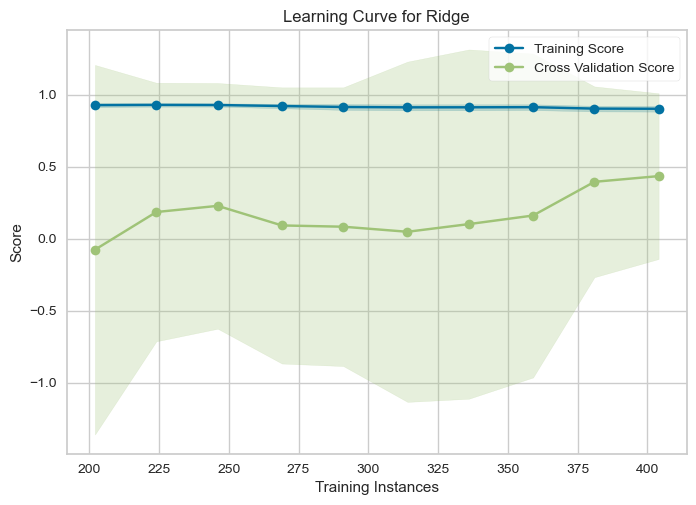

In [15]:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() #Лучшая среди гребневых регрессий, но не идеальна!

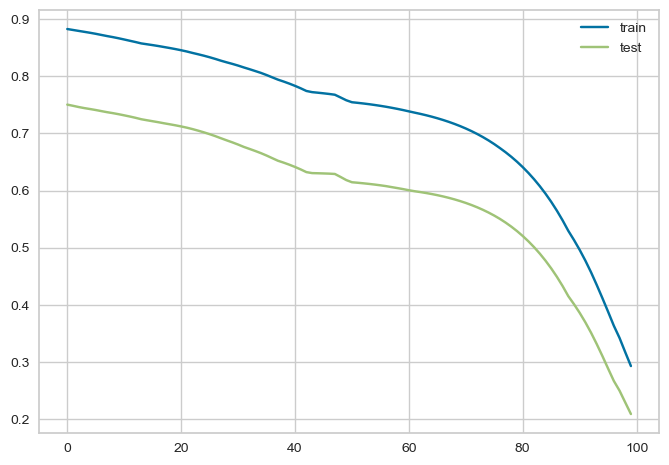

In [25]:
#Попробуем иную модель регуляризации - Лассо

trains = []
tests = []
for i in np.logspace(-1.8, 0, 100):
    ridge = Lasso(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

Точно также можно исследовать и другие виды моделей. Итого для диагностики моделей используется три инструмента:

1. сравнение обучающей и тестовой эффективности
2. анализ формы кривых обучения
3. построение кривых по одному из гиперпараметров модели, который влияет на соотношение bias/variance

Но главное - это сравнение между собой нескольких моделей одного типа, но с разным уровнем сложности (еще говорят про модели с разной склонностью к пере- или недообучению).

# Самостоятельная часть

**1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?**

In [28]:
#Генерируем датасет, делим его на тестовую и обучающую выборки
X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0, 
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

In [30]:
#Обучаем модель логистической регрессии, выводим её метрики
lr = LogisticRegression().fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'precision: {precision_score(y_pred_train, y_train):.4f}, {precision_score(y_pred_test, y_test):.4f}')
print(f'recall: {recall_score(y_pred_train, y_train):.4f}, {recall_score(y_pred_test, y_test):.4f}')
print(f'f1: {f1_score(y_pred_train, y_train):.4f}, {f1_score(y_pred_test, y_test):.4f}')

precision: 0.8515, 0.8056
recall: 0.8339, 0.8069
f1: 0.8426, 0.8062


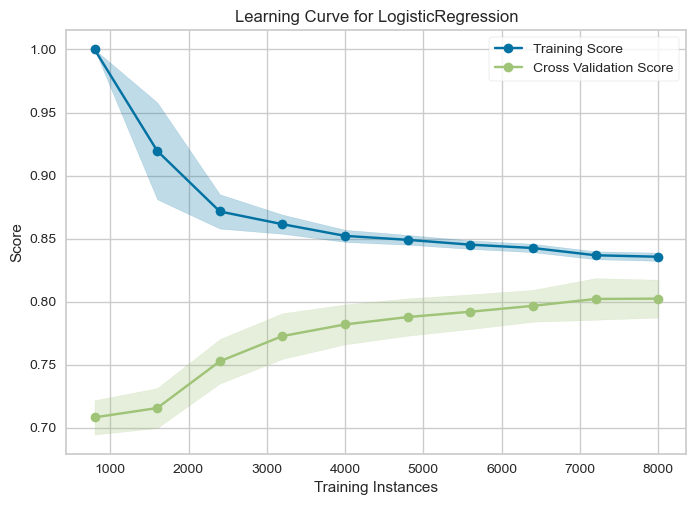

In [36]:
#Строим кривую обучения - precision
visualizer = LearningCurve(
    LogisticRegression(max_iter = 1000), train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring = make_scorer(precision_score)
).fit(X, y).show()

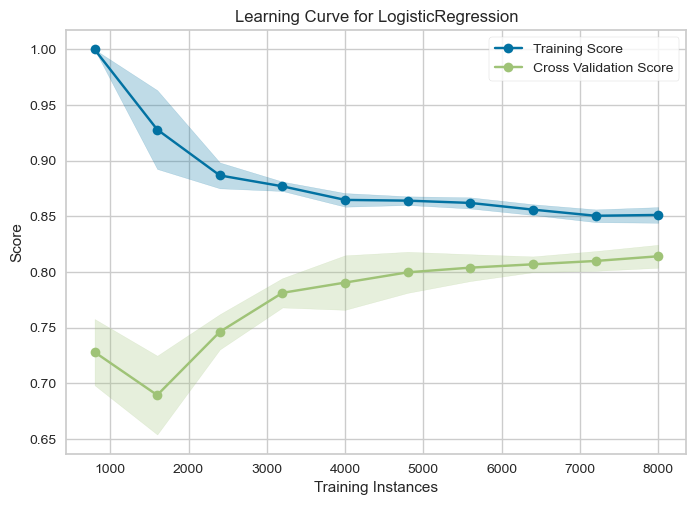

In [37]:
#Строим кривую обучения - recall
visualizer = LearningCurve(
    LogisticRegression(max_iter = 1000), train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring = make_scorer(recall_score)
).fit(X, y).show()

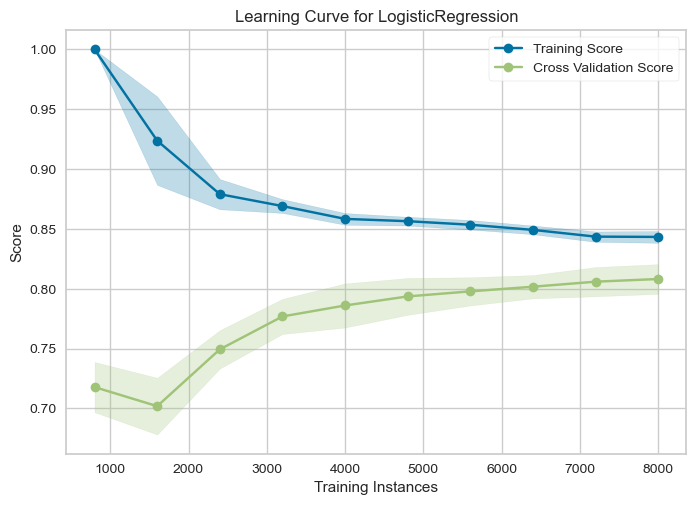

In [38]:
#Строим кривую обучения - f1
visualizer = LearningCurve(
    LogisticRegression(max_iter = 1000), train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring = make_scorer(f1_score)
).fit(X, y).show()

Модель явно переобучена

In [39]:
#Обучаем модель гребневой регрессии (с регуляризацией), выводим её метрики
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'precision: {precision_score(y_pred_train, y_train):.4f}, {precision_score(y_pred_test, y_test):.4f}')
print(f'recall: {recall_score(y_pred_train, y_train):.4f}, {recall_score(y_pred_test, y_test):.4f}')
print(f'f1: {f1_score(y_pred_train, y_train):.4f}, {f1_score(y_pred_test, y_test):.4f}')

precision: 0.7780, 0.7801
recall: 0.7683, 0.7678
f1: 0.7731, 0.7739


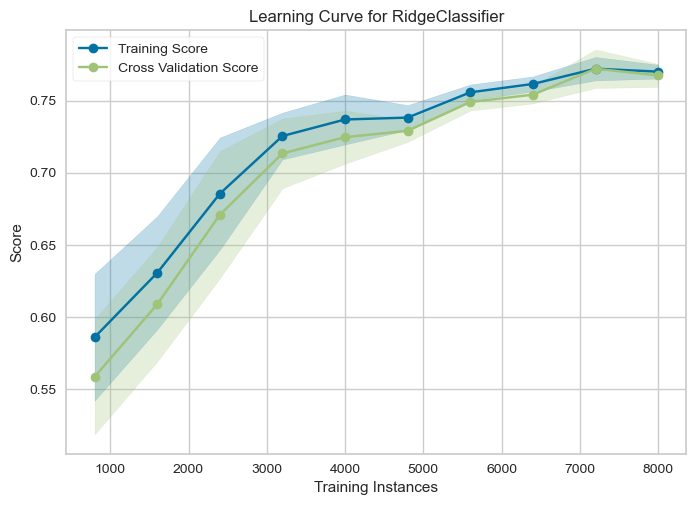

In [40]:
#Строим кривую обучения - precision
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring = make_scorer(precision_score)
).fit(X, y).show()

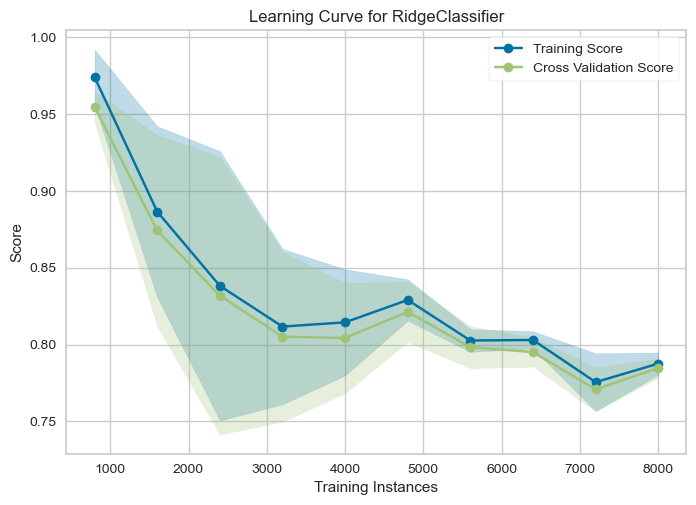

In [41]:
#Строим кривую обучения - recall
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring = make_scorer(recall_score)
).fit(X, y).show()

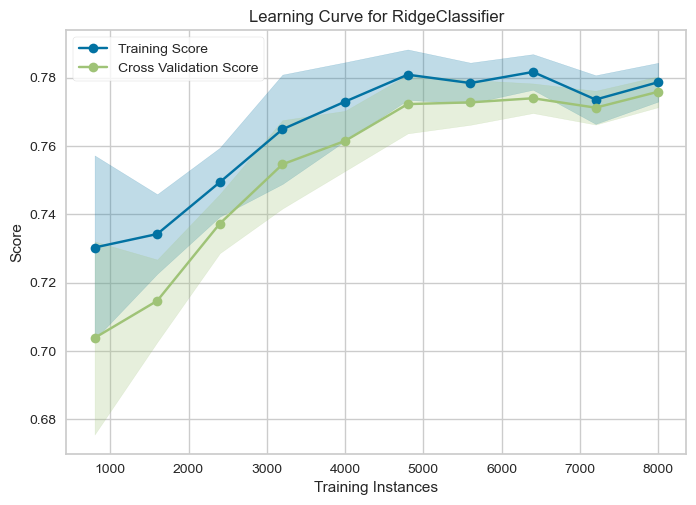

In [42]:
#Строим кривую обучения - f1
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring = make_scorer(f1_score)
).fit(X, y).show()

Модель явно недообучена

In [56]:
#Ищем оптимум
trains = []
tests = []
for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)
    
    trains.append((precision_score(y_pred_train, y_train), 
                   recall_score(y_pred_train, y_train), 
                   f1_score(y_pred_train, y_train), i))
    tests.append((precision_score(y_pred_test, y_test), 
                   recall_score(y_pred_test, y_test), 
                   f1_score(y_pred_test, y_test), i))

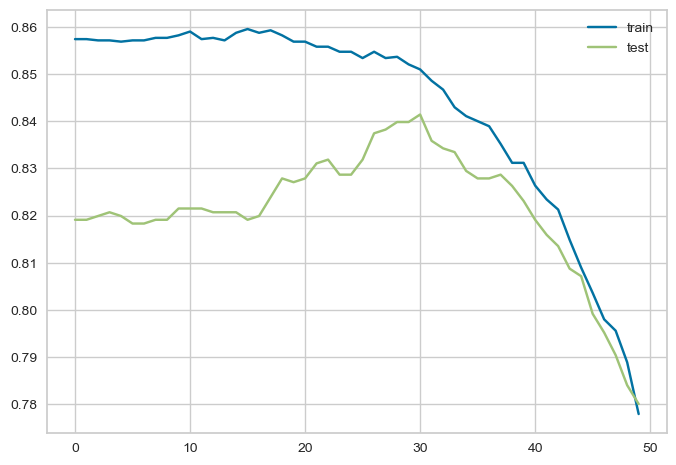

In [57]:
#precision
plt.plot([i[0] for i in trains], label="train")
plt.plot([i[0] for i in tests], label="test")
plt.legend()

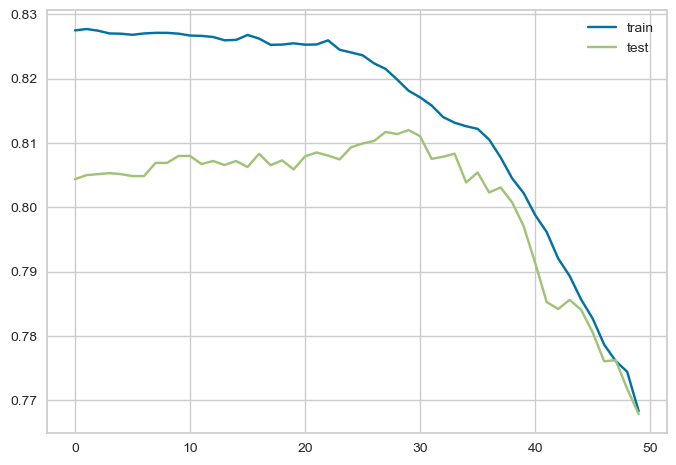

In [58]:
#recall
plt.plot([i[1] for i in trains], label="train")
plt.plot([i[1] for i in tests], label="test")
plt.legend()

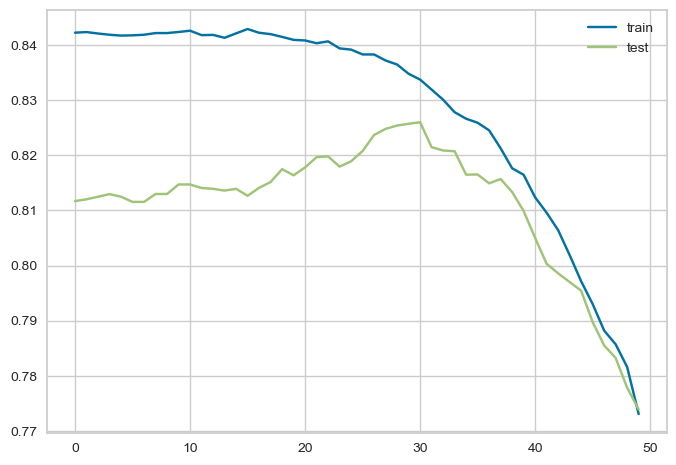

In [59]:
#f1
plt.plot([i[2] for i in trains], label="train")
plt.plot([i[2] for i in tests], label="test")
plt.legend()

Оптимум находится в точке 30

In [60]:
trains[30]

(0.8509898341359016, 0.817107629077832, 0.8337046258681693, 28117.68697974225)

In [61]:
tests[30]

(0.8414342629482072, 0.8110599078341014, 0.8259679311693391, 28117.68697974225)

In [62]:
#Обучаем ОПТИМАЛЬНУЮ модель гребневой регрессии, выводим её метрики
lr = RidgeClassifier(alpha=28000).fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'precision: {precision_score(y_pred_train, y_train):.4f}, {precision_score(y_pred_test, y_test):.4f}')
print(f'recall: {recall_score(y_pred_train, y_train):.4f}, {recall_score(y_pred_test, y_test):.4f}')
print(f'f1: {f1_score(y_pred_train, y_train):.4f}, {f1_score(y_pred_test, y_test):.4f}')

precision: 0.8510, 0.8414
recall: 0.8173, 0.8111
f1: 0.8338, 0.8260


**2. Повторите диагностику модели регрессии с использованием других видов моделей: </br>
i. метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение) </br>
ii. метода ближайших соседей (исследуйте влияние количества соседей) </br>
iii. метода решающих деревьев (гиперпараметры по вашему выбору)**

In [131]:
#Генерируем датасет, делим его на тестовую и обучающую выборки
X, y = make_classification(n_samples=1000, n_features=100, 
                           n_informative=20, n_repeated=0, 
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

SVC

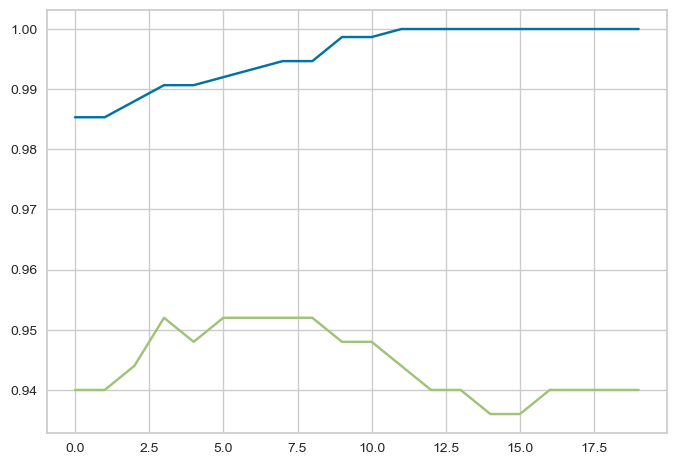

In [132]:
#Ищем оптимальную модель SVC

trains = []
tests = []
for i in np.logspace(0.01, 1, 20):
    ridge = SVC(C=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [133]:
trains[8]

0.9946666666666667

In [134]:
tests[8]

0.952

In [140]:
np.logspace(0.01, 1, 20)[8]

2.672034770873374

In [141]:
model = SVC(C = 2.672).fit(X_train, y_train)

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.9947
Test score: 0.9520


KNC

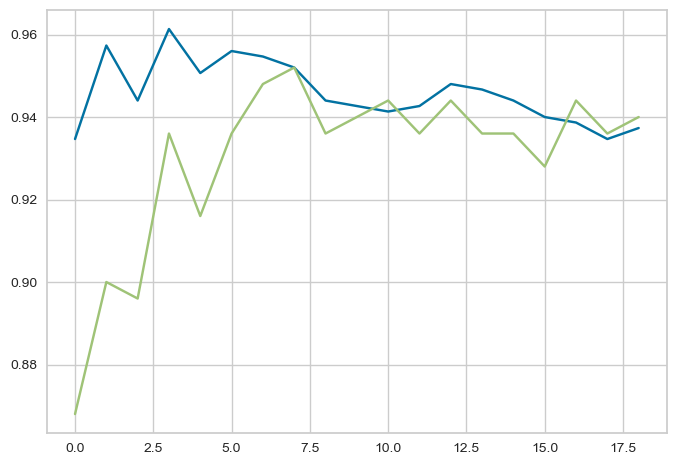

In [144]:
#Ищем оптимальную модель KNC

trains = []
tests = []
for i in np.linspace(2, 20, 19).round().astype(int):
    ridge = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [145]:
trains[7]

0.952

In [146]:
tests[7]

0.952

In [151]:
model = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.9560
Test score: 0.9360


DTC

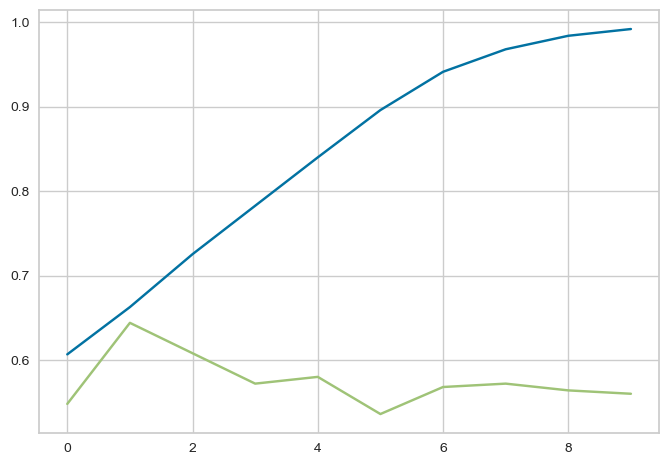

In [116]:
#Ищем оптимальную модель DTC

trains = []
tests = []
for i in np.linspace(1, 10, 10):
    ridge = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [111]:
trains[1]

0.6626666666666666

In [112]:
tests[1]

0.644

In [114]:
model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.6627
Test score: 0.6440


**3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.**

In [152]:
#Загружаем датасет цен на недвижимость
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

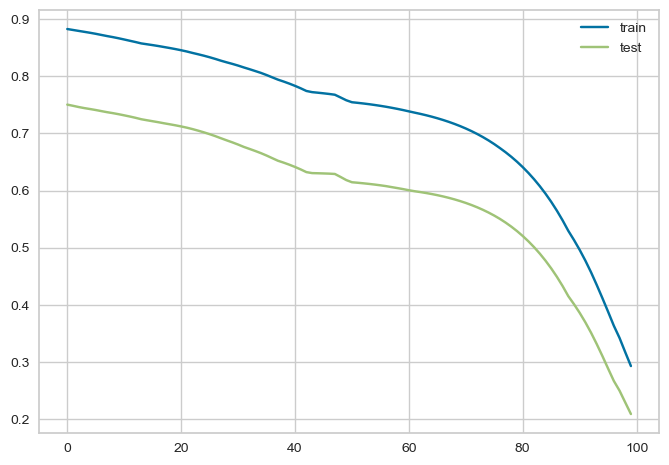

In [153]:
trains = []
tests = []
for i in np.logspace(-1.8, 0, 100):
    ridge = Lasso(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [156]:
np.logspace(-1.8, 0, 100)[0]

0.015848931924611134

Самое оптимальное - отсутствие регуляризации

In [159]:
ridge = Lasso(alpha = 0.016).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.88
Linear Regression-Test set score: 0.75


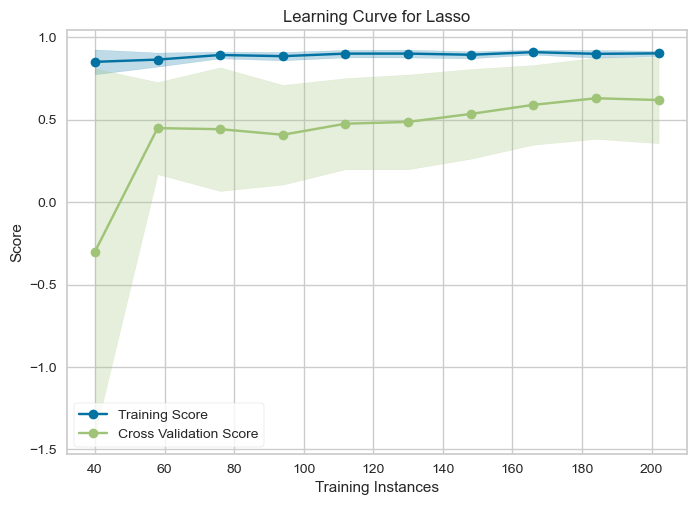

In [162]:
visualizer = LearningCurve(
    Lasso(alpha = 0.016), train_sizes=np.linspace(0.1, 0.5, 10)
).fit(X, y).show() #Данная модель оптимальна